<a href="https://colab.research.google.com/github/Vivek32singh/Coronavirus_Tweets/blob/main/Coronavirus_tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install opendatasets

In [4]:
import opendatasets as od

### Download and explore the data

In [5]:
od.download('https://www.kaggle.com/datasets/datatattle/covid-19-nlp-text-classification?select=Corona_NLP_test.csv')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: vivekkumar110802
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/datatattle/covid-19-nlp-text-classification


100%|██████████| 4.38M/4.38M [00:00<00:00, 84.2MB/s]

In [6]:
import pandas as pd


In [7]:
train_df= pd.read_csv('./covid-19-nlp-text-classification/Corona_NLP_train.csv',encoding='latin1')
test_df= pd.read_csv('./covid-19-nlp-text-classification/Corona_NLP_test.csv',encoding='latin1')

In [8]:
train_df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral


In [9]:
positive_df= train_df[train_df['Sentiment']=='Extremely Positive']
negative_df= train_df[train_df['Sentiment']=='Extremely Negative']

In [10]:
positive_df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
11,3810,48762,"Pitt Meadows, BC, Canada",16-03-2020,"Due to the Covid-19 situation, we have increas...",Extremely Positive
12,3811,48763,Horningsea,16-03-2020,#horningsea is a caring community. LetÂs ALL ...,Extremely Positive
18,3817,48769,North America,16-03-2020,"Amazon Glitch Stymies Whole Foods, Fresh Groce...",Extremely Positive
22,3821,48773,NaN,16-03-2020,We have AMAZING CHEAP DEALS! FOR THE #COVID201...,Extremely Positive
23,3822,48774,NaN,16-03-2020,We have AMAZING CHEAP DEALS! FOR THE #COVID201...,Extremely Positive
...,...,...,...,...,...,...
41137,44936,89888,"LES, NYC",14-04-2020,Distilleries have switched portions of their p...,Extremely Positive
41138,44937,89889,"Los Angeles, CA",14-04-2020,HMU FOR PRICES!! Got great deals going right n...,Extremely Positive
41142,44941,89893,Juba south sudan,14-04-2020,@MajangChien @MTNSSD @MTNSSD is worst than COV...,Extremely Positive
41148,44947,89899,NaN,14-04-2020,UV light Sterilizer Sanitizer for your mask an...,Extremely Positive


In [11]:
negative_df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
20,3819,48771,southampton soxx xxx,16-03-2020,with 100 nations inficted with covid 19 th...,Extremely Negative
27,3826,48778,Everywhere You Are!,16-03-2020,This morning I tested positive for Covid 19. I...,Extremely Negative
29,3828,48780,"Someplace, USA",16-03-2020,@7SealsOfTheEnd Soon with dwindling supplies u...,Extremely Negative
42,3841,48793,Houston,16-03-2020,CHECK VIDEO ?? https://t.co/1ksn9Brl02 ??No fo...,Extremely Negative
...,...,...,...,...,...,...
41115,44914,89866,NaN,14-04-2020,Food Banks are not equipped for a 30% unemploy...,Extremely Negative
41128,44927,89879,"Melbourne, Australia",14-04-2020,The COVID-19 pandemic and global oil price war...,Extremely Negative
41130,44929,89881,NaN,14-04-2020,Squeo works in the meat department of a Kroger...,Extremely Negative
41133,44932,89884,Austria,14-04-2020,A Singaporean politician who slammed a woman s...,Extremely Negative


In [12]:
sentiment_mapping = {
    'Extremely Negative': 0,
    'Negative': 1,
    'Neutral': 2,
    'Positive': 3,
    'Extremely Positive': 4
}

# Apply the mapping to the 'Sentiment' column
train_df['Sentiment'] = train_df['Sentiment'].replace(sentiment_mapping)
test_df['Sentiment'] = test_df['Sentiment'].replace(sentiment_mapping)

In [13]:
train_df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,2
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,3
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,3
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,3
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",0
...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,2
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,0
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,3
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,2


In [14]:
test_df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,0
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,3
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,4
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,1
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,2
...,...,...,...,...,...,...
3793,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,3
3794,3795,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,1
3795,3796,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,2
3796,3797,48749,NaN,16-03-2020,Gov need to do somethings instead of biar je r...,0


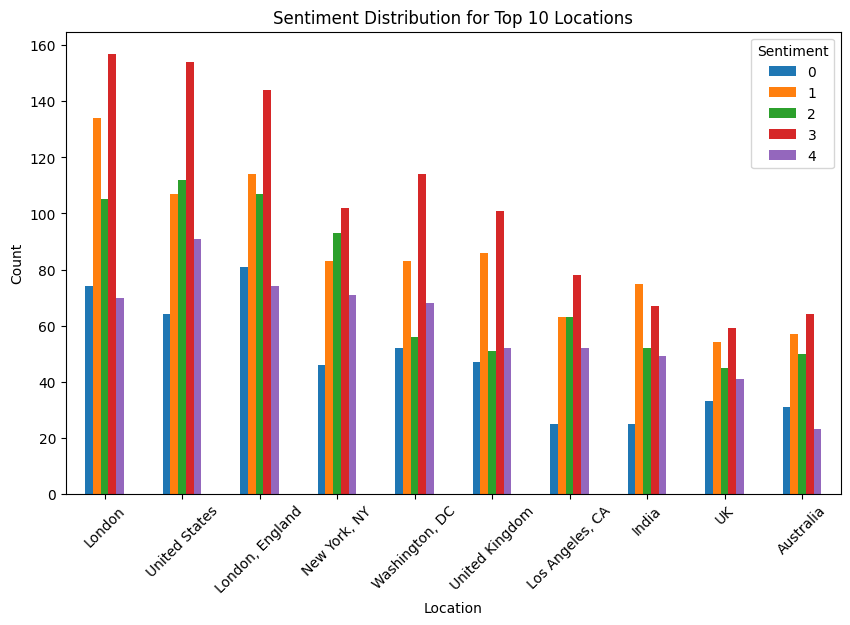

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
location_sentiment_counts = train_df.groupby(['Location', 'Sentiment']).size().unstack(fill_value=0)
top_locations = train_df['Location'].value_counts().head(10).index
location_sentiment_counts = location_sentiment_counts.loc[top_locations]
location_sentiment_counts.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Sentiment Distribution for Top 10 Locations')
plt.xticks(rotation=45)
plt.show()

In [16]:
train_df.OriginalTweet[0]

'@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8'

<Axes: xlabel='Sentiment'>

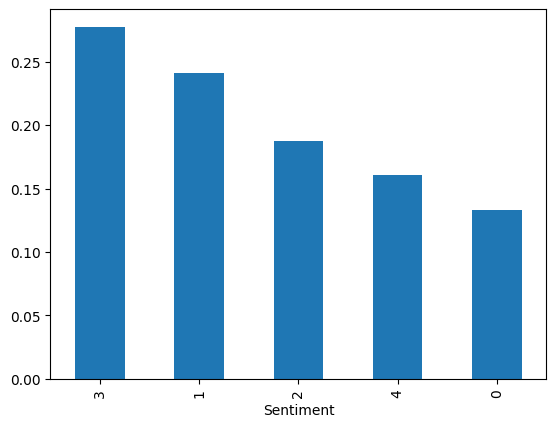

In [17]:
train_df.Sentiment.value_counts(normalize=True).plot(kind='bar')

### Tokenzier

In [20]:
import nltk

In [21]:
from nltk.tokenize import word_tokenize

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [23]:
word_tokenize('This is a test sentence.')

['This', 'is', 'a', 'test', 'sentence', '.']

### Stopwords


In [24]:
from nltk.corpus import stopwords

In [25]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [26]:
english_stopwords = stopwords.words('english')

In [27]:
", ".join(english_stopwords)

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

### As this is sentiment analysis so we have to consider the words like (not,nor,etc.)

In [28]:
eng_stopwords=english_stopwords[:116]

In [29]:
','.join(eng_stopwords)

"i,me,my,myself,we,our,ours,ourselves,you,you're,you've,you'll,you'd,your,yours,yourself,yourselves,he,him,his,himself,she,she's,her,hers,herself,it,it's,its,itself,they,them,their,theirs,themselves,what,which,who,whom,this,that,that'll,these,those,am,is,are,was,were,be,been,being,have,has,had,having,do,does,did,doing,a,an,the,and,but,if,or,because,as,until,while,of,at,by,for,with,about,against,between,into,through,during,before,after,above,below,to,from,up,down,in,out,on,off,over,under,again,further,then,once,here,there,when,where,why,how,all,any,both,each,few,more,most,other,some,such"

In [30]:
def remove_stopwords(tokens):
    return [word for word in tokens if word.lower() not in eng_stopwords]

In [31]:
remove_stopwords(train_df.OriginalTweet[0].split())

['@MeNyrbie',
 '@Phil_Gahan',
 '@Chrisitv',
 'https://t.co/iFz9FAn2Pa',
 'https://t.co/xX6ghGFzCC',
 'https://t.co/I2NlzdxNo8']

In [32]:
remove_stopwords(test_df.OriginalTweet[0].split())

['TRENDING:',
 'New',
 'Yorkers',
 'encounter',
 'empty',
 'supermarket',
 'shelves',
 '(pictured,',
 'Wegmans',
 'Brooklyn),',
 'sold-out',
 'online',
 'grocers',
 '(FoodKick,',
 'MaxDelivery)',
 '#coronavirus-fearing',
 'shoppers',
 'stock',
 'https://t.co/Gr76pcrLWh',
 'https://t.co/ivMKMsqdT1']

### Stemming

In [33]:
from nltk.stem.snowball import SnowballStemmer

In [34]:
stemmer = SnowballStemmer(language='english')

In [35]:
stemmer.stem('what are you doing')

'what are you do'

In [36]:
stemmer.stem(train_df.OriginalTweet[0])

'@menyrbie @phil_gahan @chrisitv https://t.co/ifz9fan2pa and https://t.co/xx6ghgfzcc and https://t.co/i2nlzdxno8'

In [37]:
stemmer.stem(test_df.OriginalTweet[0])

'trending: new yorkers encounter empty supermarket shelves (pictured, wegmans in brooklyn), sold-out online grocers (foodkick, maxdelivery) as #coronavirus-fearing shoppers stock up https://t.co/gr76pcrlwh https://t.co/ivmkmsqdt1'

### Vectorizer

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [39]:
vect=TfidfVectorizer()

In [40]:
small_df=train_df[:5]

In [41]:
small_df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,2
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,3
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,3
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,3
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",0


In [42]:
vect.fit(small_df.OriginalTweet)

TfidfVectorizer()

In [43]:
vect.vocabulary_

{'menyrbie': 56,
 'phil_gahan': 72,
 'chrisitv': 15,
 'https': 46,
 'co': 16,
 'ifz9fan2pa': 49,
 'and': 5,
 'xx6ghgfzcc': 103,
 'i2nlzdxno8': 47,
 'advice': 3,
 'talk': 91,
 'to': 96,
 'your': 105,
 'neighbours': 60,
 'family': 39,
 'exchange': 38,
 'phone': 73,
 'numbers': 62,
 'create': 27,
 'contact': 20,
 'list': 52,
 'with': 101,
 'of': 63,
 'schools': 80,
 'employer': 34,
 'chemist': 14,
 'gp': 44,
 'set': 82,
 'up': 97,
 'online': 65,
 'shopping': 83,
 'accounts': 1,
 'if': 48,
 'poss': 75,
 'adequate': 2,
 'supplies': 89,
 'regular': 77,
 'meds': 55,
 'but': 11,
 'not': 61,
 'over': 69,
 'order': 67,
 'coronavirus': 21,
 'australia': 7,
 'woolworths': 102,
 'give': 42,
 'elderly': 33,
 'disabled': 29,
 'dedicated': 28,
 'hours': 45,
 'amid': 4,
 'covid': 23,
 '19': 0,
 'outbreak': 68,
 'binca9vp8p': 10,
 'my': 58,
 'food': 40,
 'stock': 87,
 'is': 50,
 'the': 93,
 'only': 66,
 'one': 64,
 'which': 99,
 'empty': 35,
 'please': 74,
 'don': 31,
 'panic': 70,
 'there': 94,
 'will'

In [44]:
vect.get_feature_names_out()

array(['19', 'accounts', 'adequate', 'advice', 'amid', 'and', 'at',
       'australia', 'be', 'because', 'binca9vp8p', 'but', 'calm',
       'causes', 'chemist', 'chrisitv', 'co', 'confinement',
       'confinementgeneral', 'confinementotal', 'contact', 'coronavirus',
       'coronavirusfrance', 'covid', 'covid19', 'covid19france',
       'covid_19', 'create', 'dedicated', 'disabled', 'do', 'don',
       'during', 'elderly', 'employer', 'empty', 'enough', 'everyone',
       'exchange', 'family', 'food', 'for', 'give', 'go', 'gp', 'hours',
       'https', 'i2nlzdxno8', 'if', 'ifz9fan2pa', 'is', 'it', 'list',
       'litteraly', 'me', 'meds', 'menyrbie', 'more', 'my', 'need',
       'neighbours', 'not', 'numbers', 'of', 'one', 'online', 'only',
       'order', 'outbreak', 'over', 'panic', 'paranoid', 'phil_gahan',
       'phone', 'please', 'poss', 'ready', 'regular', 'restezchezvous',
       'safe', 'schools', 'serious', 'set', 'shopping', 'shortage',
       'stay', 'stayathome', 'stock'

In [45]:
vectors = vect.transform(small_df.OriginalTweet)

In [46]:
array=vectors.toarray()

In [47]:
shape=array.shape

In [48]:
shape

(5, 107)

In [49]:
small_df.OriginalTweet[0]

'@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8'

In [50]:
vectors[0].toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.50454244, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.25227122, 0.42637561, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.42637561, 0.25227122, 0.        , 0.25227122,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.25227122, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.25227122, 0.  

### Transforming train and test data

In [51]:
stemmer = SnowballStemmer(language='english')

In [52]:
def tokenized(text):
    return [stemmer.stem(word) for word in word_tokenize(text)]

In [53]:
vector=TfidfVectorizer(tokenizer=tokenized,max_features=2000,stop_words=eng_stopwords)

In [54]:
vector.fit(train_df.OriginalTweet)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'s", 'abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'll', 'onc', 'ourselv', 're', 'themselv', 've', 'whi', 'yourselv'] not in stop_words.
  warnings.warn(


TfidfVectorizer(max_features=2000,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function tokenized at 0x7b85d83ca4d0>)

In [55]:
len(vector.vocabulary_)

2000

In [56]:
vector.get_feature_names_out()[:10]

array(['!', '#', '$', '%', '&', "'", "''", "'d", "'m", "'s"], dtype=object)

### Made input and target cols

In [57]:
input=vector.transform(train_df.OriginalTweet)

In [58]:
input.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.33138745, 0.16050572, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.34579256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.38406411, ..., 0.        , 0.        ,
        0.        ]])

In [59]:
input.shape

(41157, 2000)

In [60]:
test=vector.transform(test_df.OriginalTweet)

In [61]:
test.toarray()

array([[0.        , 0.072244  , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.30754726, 0.14895885, 0.22711438, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.14189569, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.07447458, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [62]:
test.shape

(3798, 2000)

### Split the data in training and validation set

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
train_inputs, val_inputs, train_targets, val_targets = train_test_split(input, train_df.Sentiment,
                                                                        test_size=0.3, random_state=42)

In [65]:
train_inputs.shape

(28809, 2000)

In [66]:
train_targets.shape

(28809,)

In [67]:
val_inputs.shape

(12348, 2000)

In [68]:
val_targets.shape

(12348,)

### Train Logistic Regression model

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
MAX_ITER = 2000

In [71]:
model = LogisticRegression(max_iter=MAX_ITER, solver='saga',penalty="l1")

In [72]:
%%time
model.fit(train_inputs, train_targets)

CPU times: user 22.9 s, sys: 30.1 ms, total: 23 s
Wall time: 23.1 s


LogisticRegression(max_iter=2000, penalty='l1', solver='saga')

### make prediction on train and test data

In [73]:
train_preds = model.predict(train_inputs)

In [74]:
train_targets

20468    2
36278    4
15665    4
38348    0
32507    3
        ..
6265     1
11284    1
38158    0
860      2
15795    0
Name: Sentiment, Length: 28809, dtype: int64

In [75]:
train_preds

array([2, 3, 4, ..., 0, 2, 2])

In [76]:
val_preds=model.predict(val_inputs)

In [77]:
val_preds

array([1, 1, 2, ..., 0, 3, 3])

In [78]:
val_targets

31089    2
35564    0
144      3
8202     3
31720    1
        ..
21208    4
31560    2
5245     0
1715     1
40733    3
Name: Sentiment, Length: 12348, dtype: int64

### find the accuracy score

In [79]:
from sklearn.metrics import accuracy_score

In [80]:
accuracy = accuracy_score(train_targets, train_preds)

In [81]:
accuracy

0.6974209448436253

In [82]:
accuracy1 = accuracy_score(val_targets, val_preds)

In [83]:
accuracy1

0.6387269193391643

### Train Decision Tree Classifier

In [84]:
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(random_state=42)

In [85]:
%%time
model1.fit(train_inputs, train_targets)

CPU times: user 11.6 s, sys: 24 ms, total: 11.6 s
Wall time: 12.5 s


DecisionTreeClassifier(random_state=42)

### Make prediction on train and test data

In [86]:
train_preds1 = model1.predict(train_inputs)

In [87]:
train_targets

20468    2
36278    4
15665    4
38348    0
32507    3
        ..
6265     1
11284    1
38158    0
860      2
15795    0
Name: Sentiment, Length: 28809, dtype: int64

In [88]:
train_preds1

array([2, 4, 4, ..., 0, 2, 0])

In [89]:
val_preds1=model1.predict(val_inputs)

In [90]:
val_targets

31089    2
35564    0
144      3
8202     3
31720    1
        ..
21208    4
31560    2
5245     0
1715     1
40733    3
Name: Sentiment, Length: 12348, dtype: int64

In [91]:
val_preds1

array([1, 0, 2, ..., 0, 3, 0])

### Find the accuracy score

In [92]:
accuracy_dec = accuracy_score(train_targets, train_preds1)

In [93]:
accuracy_dec

0.9998264431254122

In [94]:
accuracy_dec1 = accuracy_score(val_targets, val_preds1)

In [95]:
accuracy_dec1

0.4071104632329122

As we can see our model performed very poor in val set it means model is overfitting

### Hyperparameter Tuning

In [99]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


Randomized SearchCV

In [100]:
dt=DecisionTreeClassifier()
dt_randomcv=RandomizedSearchCV(estimator=dt,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
dt_randomcv.fit(train_inputs, train_targets)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14]},
                   random_state=100, verbose=2)

In [101]:
dt_randomcv.best_params_

{'min_samples_split': 14,
 'min_samples_leaf': 6,
 'max_features': 'sqrt',
 'max_depth': 1000,
 'criterion': 'gini'}

In [102]:
best_random_grid=dt_randomcv.best_estimator_

In [104]:
val_pred2=best_random_grid.predict(val_inputs)

In [105]:
accuracy2=accuracy_score(val_targets,val_pred2)

In [106]:
accuracy2

0.3999028182701652

In [107]:
dt_randomcv.best_params_

{'min_samples_split': 14,
 'min_samples_leaf': 6,
 'max_features': 'sqrt',
 'max_depth': 1000,
 'criterion': 'gini'}

 GridSearch CV

In [109]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [dt_randomcv.best_params_['criterion']],
    'max_depth': [dt_randomcv.best_params_['max_depth']],
    'max_features': [dt_randomcv.best_params_['max_features']],
    'min_samples_leaf': [dt_randomcv.best_params_['min_samples_leaf'],
                         dt_randomcv.best_params_['min_samples_leaf']+2,
                         dt_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [dt_randomcv.best_params_['min_samples_split'] - 2,
                          dt_randomcv.best_params_['min_samples_split'] - 1,
                          dt_randomcv.best_params_['min_samples_split'],
                          dt_randomcv.best_params_['min_samples_split'] +1,
                          dt_randomcv.best_params_['min_samples_split'] + 2]
}

print(param_grid)

{'criterion': ['gini'], 'max_depth': [1000], 'max_features': ['sqrt'], 'min_samples_leaf': [6, 8, 10], 'min_samples_split': [12, 13, 14, 15, 16]}


In [110]:
dt=DecisionTreeClassifier()
grid_search=GridSearchCV(estimator=dt,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(train_inputs, train_targets)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [1000],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [6, 8, 10],
                         'min_samples_split': [12, 13, 14, 15, 16]},
             verbose=2)

In [111]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=1000, max_features='sqrt', min_samples_leaf=8,
                       min_samples_split=14)

In [112]:
best_grid=grid_search.best_estimator_

In [113]:
best_grid

DecisionTreeClassifier(max_depth=1000, max_features='sqrt', min_samples_leaf=8,
                       min_samples_split=14)

In [115]:
val_pred3=best_grid.predict(val_inputs)

In [116]:
accuracy3=accuracy_score(val_targets,val_pred3)

In [117]:
accuracy3

0.3807904114026563

In [118]:
train_pred3=best_grid.predict(train_inputs)

In [119]:
accuracy4=accuracy_score(train_targets,train_pred3)

In [120]:
accuracy4

0.4837724322260405